In [66]:
from __future__ import print_function, division
import numpy as np

import time
import argparse
import os
import os.path as path
from os import listdir 
from os.path import isfile, join
import copy
import pickle
from tqdm import tqdm
from collections import namedtuple

import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary
from torchvision.models import alexnet, vgg11, vgg13, vgg16, vgg19
from torchvision.models import vgg11_bn, vgg13_bn, vgg16_bn, vgg19_bn
from torchvision.models import resnet18, resnet34, resnet50, resnet101, resnet152


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from scipy.stats import pearsonr

from matplotlib import pyplot as plt

import pickle

In [67]:
# random numbers https://discuss.pytorch.org/t/random-seed-initialization/7854/14
torch.backends.cudnn.deterministic = True
torch.manual_seed(999)

# path
cwd = os.getcwd()
parts = cwd.split('/scripts/pretrained')
ROOT = parts[0]
os.chdir(ROOT)
import sys
sys.path.insert(0, ROOT)

from IDNN.intrinsic_dimension import estimate, block_analysis
from scipy.spatial.distance import pdist,squareform

In [68]:
# uncomment this if you want to check all archs, notice that we did not upload all the results in
# the results_provided folder in order to save space

#archs = ['alexnet', 'vgg11', 'vgg13', 'vgg16', 'vgg19',
#         'vgg11_bn','vgg13_bn', 'vgg16_bn', 'vgg19_bn',
#         'resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']

archs = ['vgg16']

In [69]:
th = 0.9
def get_pca_dim(x, th):
    cs = np.cumsum(x)
    return np.argwhere(cs > th)[0][0]

In [70]:
def get_color(arch):
    if 'alex' in arch:
        color = 'r'
    if 'vgg' in arch:
        color = 'b'
    if 'bn' in arch:
        color = 'k'
    if 'res' in arch:
        color = 'g'
    if 'dense' in arch:
        color = 'm'
    if 'squeeze' in arch:
        color = 'y'
    return color   

In [71]:
choice = 'results_provided'

# uncomment this line if you want to check your results
#choice = 'results'

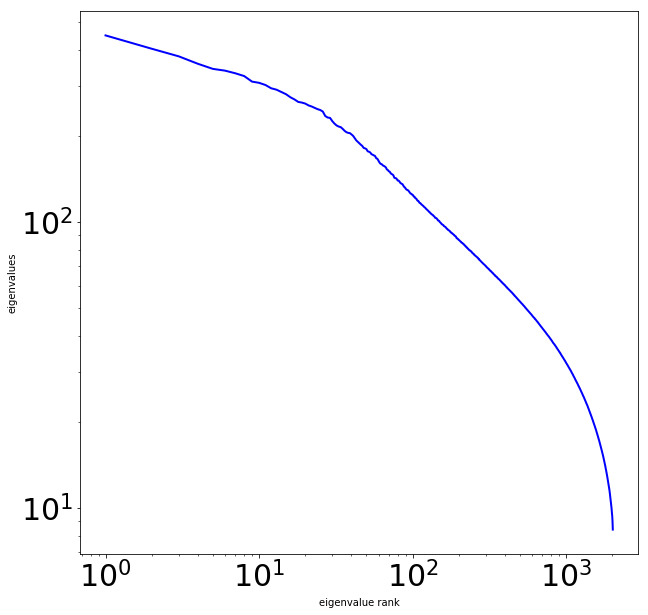

In [72]:
fs = 30
ms = 10
neigs = -1
alpha = 1
count = 0
lw=2

fig = plt.figure(figsize=(10,10))
for arch in archs:
    
    results_folder = join(ROOT, 'data', 'pretrained', choice, 
                          'last_hidden_pca_trained')    

    pca = pickle.load(open( join(results_folder, arch + '_pca.pkl'), 'rb' ) )
        
        
    count += 1
        
    plt.loglog(np.arange(1,pca.explained_variance_ratio_.shape[0]),
                     pca.singular_values_[:neigs],                     
                     '-'             
                     + get_color(arch),
                     markersize=ms,
                     linewidth=lw,
                     alpha=alpha,
                     label=arch)   
        
        
        
    id_pc = get_pca_dim(pca.explained_variance_ratio_,th)
        
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.xlabel('eigenvalue rank')
plt.ylabel('eigenvalues')

plt.show()

In [73]:
sizes = np.arange(0,100,5)*10
sizes = sizes[1:]

In [74]:
fs = 20
ms = 20

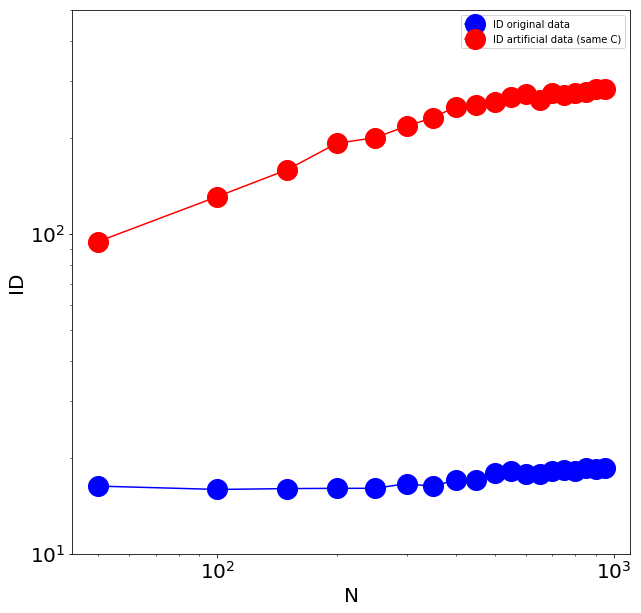

In [75]:
arch = 'vgg16'

fig = plt.figure(figsize=(10,10))
results_folder = join(ROOT, 'data', 'pretrained', choice, 'last_hidden_pca_trained')

IDs = pickle.load(open( join(results_folder, arch + '_IDs.pkl'), 'rb' ) )
        
plt.loglog(sizes,IDs['ID_original'],'-bo',markersize=ms,label='ID original data')
plt.loglog(sizes,IDs['ID_ellipse'],'-ro',markersize=ms,label='ID artificial data (same C)')
    
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel('N',fontsize=fs)
plt.ylim([10,500])
plt.legend(fontsize=10)
plt.ylabel('ID',fontsize=fs)
plt.show()